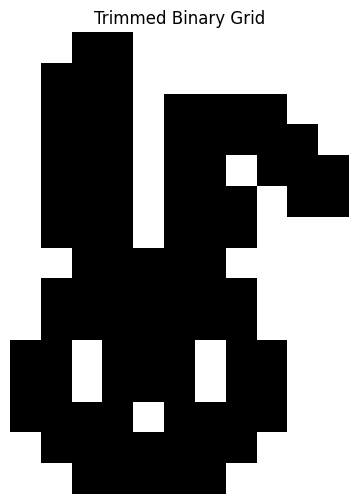

Trimmed grid dimensions: 15 x 11

Trimmed grid:
[[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0], [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0], [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0]]


In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def trim_edges(grid):
    grid = np.array(grid)
    
    # Find first and last non-empty rows
    non_empty_rows = np.where(np.any(grid != 0, axis=1))[0]
    if len(non_empty_rows) == 0:
        return [[]]
    first_row, last_row = non_empty_rows[0], non_empty_rows[-1]
    
    # Find first and last non-empty columns
    non_empty_cols = np.where(np.any(grid != 0, axis=0))[0]
    if len(non_empty_cols) == 0:
        return [[]]
    first_col, last_col = non_empty_cols[0], non_empty_cols[-1]
    
    # Trim the grid
    return grid[first_row:last_row+1, first_col:last_col+1]

def png_to_2d_grid(png_path):
    with Image.open(png_path) as img:
        img = img.convert('RGBA')
        alpha = np.array(img)[:, :, 3]
        img = img.convert('L')
        
        img_array = np.array(img)
        binary_grid = (img_array < 128).astype(int)
        binary_grid[alpha == 0] = 0
        
        # Get trimmed grid
        trimmed_grid = trim_edges(binary_grid)
        
        # Display trimmed binary grid only
        plt.figure(figsize=(6, 6))
        plt.imshow(trimmed_grid, cmap='binary')
        plt.title('Trimmed Binary Grid')
        plt.axis('off')
        plt.show()
        
        return trimmed_grid.tolist()

png_path = "/Users/petrsushko/Downloads/bun_white.png"
grid = png_to_2d_grid(png_path)
print("Trimmed grid dimensions:", len(grid), "x", len(grid[0]))
print("\nTrimmed grid:")
print(grid)

In [31]:
import os
import json

def get_consecutive_ones(row):
    clues = []
    count = 0
    
    for cell in row:
        if cell == 1:
            count += 1
        elif count > 0:
            clues.append(count)
            count = 0
    
    if count > 0:
        clues.append(count)
    
    return clues if clues else [0]

def generate_nonogram_data(grid, name):
    grid = np.array(grid)
    
    # Generate row clues
    clue_row_data = [get_consecutive_ones(row) for row in grid]
    
    # Generate column clues
    clue_col_data = [get_consecutive_ones(col) for col in grid.T]
    
    # Calculate max clues
    max_clue_rows = max(len(clues) for clues in clue_row_data)
    max_clue_cols = max(len(clues) for clues in clue_col_data)
    
    puzzle_data = {
        "name": name,
        "clueRowData": clue_row_data,
        "clueColData": clue_col_data,
        "maxClueRows": max_clue_rows,
        "maxClueCols": max_clue_cols,
        "solution": grid.tolist()
    }
    
    return puzzle_data

Saved puzzle to bun_white.json


In [32]:
import os
import json

# Get the name from the PNG file (without extension)
png_name = os.path.splitext(os.path.basename(png_path))[0]

# Generate puzzle data
puzzle = generate_nonogram_data(grid, png_name.capitalize())

# Save to JSON file with custom formatting
json_path = f"{png_name}.json"
with open(json_path, 'w') as f:
    f.write("{\n")
    keys = list(puzzle.keys())
    for i, key in enumerate(keys):
        comma = "," if i < len(keys) - 1 else ""
        f.write(f'    "{key}": {json.dumps(puzzle[key])}{comma}\n')
    f.write("}\n")

print(f"Saved puzzle to {json_path}")


Saved puzzle to bun_white.json
